In [5]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib
# Numpy options
np.random.seed(78)
# Pandas options
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 400)
# Matplotlib options
matplotlib.rcParams['image.cmap'] = 'viridis'
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10,6)

In [66]:
df1 = pd.read_excel(open('USFoodCommodity.xls','rb'), sheetname='94-98 FAH')

In [67]:
print(df1)

    Appendix Table B-1.  LAFA at-home shares: 1994-98 means and confidence intervals for U.S. children and adults  \
0                                                  NaN                                                              
1                                                  NaN                                                              
2                                                  NaN                                                              
3                                                  NaN                                                              
4                                                  NaN                                                              
5                                          Total fruit                                                              
6                                        Apples, Total                                                              
7                                      Apples as fruit          

In [68]:
df_men=df1[78:91]

In [69]:
print(df_men)

   Appendix Table B-1.  LAFA at-home shares: 1994-98 means and confidence intervals for U.S. children and adults  \
78                                    Apples as fruit                                                              
79                                        Apple juice                                                              
80                                            Bananas                                                              
81                                            Berries                                                              
82                                             Grapes                                                              
83                                             Melons                                                              
84                                     Oranges, Total                                                              
85                                   Oranges as fruit                   

In [70]:
df_men=df_men[['Unnamed: 7','Unnamed: 8','Unnamed: 9']]

In [71]:
print(df_men)

   Unnamed: 7 Unnamed: 8 Unnamed: 9
78      89.18      86.79      91.57
79      88.78      81.91      95.65
80      95.42      93.98      96.86
81      84.21      80.33      88.09
82      88.79      86.14      91.44
83      80.74      75.26      86.22
84      85.66      83.12       88.2
85      92.31      88.68      95.94
86      85.15      82.45      87.85
87      79.82      75.07      84.57
88      88.95      85.97      91.93
89      74.61         68      81.22
90      62.44      60.74      64.14


In [72]:
df_men.columns = ['Mean', 'Lower','Upper']

In [39]:
df_men = df_men.drop(df_men.index[1])

In [74]:
print(df_men)

     Mean  Lower  Upper
78  89.18  86.79  91.57
79  88.78  81.91  95.65
80  95.42  93.98  96.86
81  84.21  80.33  88.09
82  88.79  86.14  91.44
83  80.74  75.26  86.22
84  85.66  83.12   88.2
85  92.31  88.68  95.94
86  85.15  82.45  87.85
87  79.82  75.07  84.57
88  88.95  85.97  91.93
89  74.61     68  81.22
90  62.44  60.74  64.14


In [75]:
print(df_men)


     Mean  Lower  Upper
78  89.18  86.79  91.57
79  88.78  81.91  95.65
80  95.42  93.98  96.86
81  84.21  80.33  88.09
82  88.79  86.14  91.44
83  80.74  75.26  86.22
84  85.66  83.12   88.2
85  92.31  88.68  95.94
86  85.15  82.45  87.85
87  79.82  75.07  84.57
88  88.95  85.97  91.93
89  74.61     68  81.22
90  62.44  60.74  64.14


In [76]:
df_men.ix['78','Fruit Type']= 'Apples'

In [86]:
print(df_men)

     Mean  Lower  Upper Fruit Type
78  89.18  86.79  91.57        NaN
80  95.42  93.98  96.86        NaN
81  84.21  80.33  88.09        NaN
82  88.79  86.14  91.44        NaN
83  80.74  75.26  86.22        NaN
84  85.66  83.12   88.2        NaN
85  92.31  88.68  95.94        NaN
86  85.15  82.45  87.85        NaN
87  79.82  75.07  84.57        NaN
88  88.95  85.97  91.93        NaN
89  74.61     68  81.22        NaN
90  62.44  60.74  64.14        NaN


In [82]:
df_men.ix['0','Fruit Type']= 'Apples'

In [84]:
df_men = df_men.drop(df_men.index[-1])

In [87]:
df_men = df_men.drop('Fruit Type', 1)

In [98]:
print(df_men)

   Fruit Type   Mean  Lower  Upper   80
78      Apple  89.18  86.79  91.57  NaN
80      Apple  95.42  93.98  96.86  NaN
81      Apple  84.21  80.33  88.09  NaN
82      Apple  88.79  86.14  91.44  NaN
83      Apple  80.74  75.26  86.22  NaN
84      Apple  85.66  83.12   88.2  NaN
85      Apple  92.31  88.68  95.94  NaN
86      Apple  85.15  82.45  87.85  NaN
87      Apple  79.82  75.07  84.57  NaN
88      Apple  88.95  85.97  91.93  NaN
89      Apple  74.61     68  81.22  NaN
90      Apple  62.44  60.74  64.14  NaN


In [93]:
df_men.insert(0,'Fruit Type','Apple','Bananas')

In [95]:
df_men.ix['Fruit Type','80']='Bananas'

In [97]:
df_men = df_men.drop(df_men.index[-1])

In [100]:
df_men = df_men.drop('80', 1)

In [101]:
print(df_men)

   Fruit Type   Mean  Lower  Upper
78      Apple  89.18  86.79  91.57
80      Apple  95.42  93.98  96.86
81      Apple  84.21  80.33  88.09
82      Apple  88.79  86.14  91.44
83      Apple  80.74  75.26  86.22
84      Apple  85.66  83.12   88.2
85      Apple  92.31  88.68  95.94
86      Apple  85.15  82.45  87.85
87      Apple  79.82  75.07  84.57
88      Apple  88.95  85.97  91.93
89      Apple  74.61     68  81.22
90      Apple  62.44  60.74  64.14


In [102]:
df_men.set_value(1,0,'Bananas',True)

78      Apple
80    Bananas
81      Apple
82      Apple
83      Apple
84      Apple
85      Apple
86      Apple
87      Apple
88      Apple
89      Apple
90      Apple
Name: Fruit Type, dtype: object

In [103]:
print(df_men)

   Fruit Type   Mean  Lower  Upper
78      Apple  89.18  86.79  91.57
80    Bananas  95.42  93.98  96.86
81      Apple  84.21  80.33  88.09
82      Apple  88.79  86.14  91.44
83      Apple  80.74  75.26  86.22
84      Apple  85.66  83.12   88.2
85      Apple  92.31  88.68  95.94
86      Apple  85.15  82.45  87.85
87      Apple  79.82  75.07  84.57
88      Apple  88.95  85.97  91.93
89      Apple  74.61     68  81.22
90      Apple  62.44  60.74  64.14


In [108]:
df_men.set_value(5,0,'Melons',True)

78      Apple
80    Bananas
81    Berries
82     Grapes
83      Apple
84     Melons
85      Apple
86      Apple
87      Apple
88      Apple
89      Apple
90      Apple
Name: Fruit Type, dtype: object

In [109]:
df_men

,Fruit Type,Mean,Lower,Upper
78,Apple,89.18,86.79,91.57
80,Bananas,95.42,93.98,96.86
81,Berries,84.21,80.33,88.09
82,Grapes,88.79,86.14,91.44
83,Apple,80.74,75.26,86.22
84,Melons,85.66,83.12,88.2
85,Apple,92.31,88.68,95.94
86,Apple,85.15,82.45,87.85
87,Apple,79.82,75.07,84.57
88,Apple,88.95,85.97,91.93


In [110]:
df_men.set_value(4,0,'Melons',True)
df_men.set_value(5,0,'Oranges',True)

78      Apple
80    Bananas
81    Berries
82     Grapes
83     Melons
84    Oranges
85      Apple
86      Apple
87      Apple
88      Apple
89      Apple
90      Apple
Name: Fruit Type, dtype: object

In [111]:
df_men.set_value(6,0,'Other Citrus',True)
df_men.set_value(7,0,'Stone fruit',True)
df_men.set_value(8,0,'Tropical fruit',True)


78             Apple
80           Bananas
81           Berries
82            Grapes
83            Melons
84           Oranges
85      Other Citrus
86       Stone fruit
87    Tropical fruit
88             Apple
89             Apple
90             Apple
Name: Fruit Type, dtype: object

In [112]:
df_men

,Fruit Type,Mean,Lower,Upper
78,Apple,89.18,86.79,91.57
80,Bananas,95.42,93.98,96.86
81,Berries,84.21,80.33,88.09
82,Grapes,88.79,86.14,91.44
83,Melons,80.74,75.26,86.22
84,Oranges,85.66,83.12,88.2
85,Other Citrus,92.31,88.68,95.94
86,Stone fruit,85.15,82.45,87.85
87,Tropical fruit,79.82,75.07,84.57
88,Apple,88.95,85.97,91.93


In [115]:
df_men = df_men.drop(df_men.index[6])


In [116]:
df_men

,Fruit Type,Mean,Lower,Upper
78,Apple,89.18,86.79,91.57
80,Bananas,95.42,93.98,96.86
81,Berries,84.21,80.33,88.09
82,Grapes,88.79,86.14,91.44
83,Melons,80.74,75.26,86.22
84,Oranges,85.66,83.12,88.2
87,Tropical fruit,79.82,75.07,84.57
88,Apple,88.95,85.97,91.93
89,Apple,74.61,68,81.22
90,Apple,62.44,60.74,64.14


In [117]:
df_men.set_value(6,0,'Other Citrus',True)
df_men.set_value(7,0,'Stone fruit',True)
df_men.set_value(8,0,'Tropical fruit',True)

78             Apple
80           Bananas
81           Berries
82            Grapes
83            Melons
84           Oranges
87      Other Citrus
88       Stone fruit
89    Tropical fruit
90             Apple
Name: Fruit Type, dtype: object

In [118]:
df_men

,Fruit Type,Mean,Lower,Upper
78,Apple,89.18,86.79,91.57
80,Bananas,95.42,93.98,96.86
81,Berries,84.21,80.33,88.09
82,Grapes,88.79,86.14,91.44
83,Melons,80.74,75.26,86.22
84,Oranges,85.66,83.12,88.2
87,Other Citrus,79.82,75.07,84.57
88,Stone fruit,88.95,85.97,91.93
89,Tropical fruit,74.61,68,81.22
90,Apple,62.44,60.74,64.14


In [119]:
df_men = df_men.drop(df_men.index[-1])



In [120]:
df_men

,Fruit Type,Mean,Lower,Upper
78,Apple,89.18,86.79,91.57
80,Bananas,95.42,93.98,96.86
81,Berries,84.21,80.33,88.09
82,Grapes,88.79,86.14,91.44
83,Melons,80.74,75.26,86.22
84,Oranges,85.66,83.12,88.2
87,Other Citrus,79.82,75.07,84.57
88,Stone fruit,88.95,85.97,91.93
89,Tropical fruit,74.61,68,81.22


In [121]:
df_men = df_men.drop('Lower', 1)
df_men = df_men.drop('Upper', 1)


In [122]:
df_men

,Fruit Type,Mean
78,Apple,89.18
80,Bananas,95.42
81,Berries,84.21
82,Grapes,88.79
83,Melons,80.74
84,Oranges,85.66
87,Other Citrus,79.82
88,Stone fruit,88.95
89,Tropical fruit,74.61


In [123]:
df_test = df_men

In [130]:
df_men = df_men.reset_index(drop=True)

In [131]:
df_men

,Fruit Type,Mean
0,Apple,89.18
1,Bananas,95.42
2,Berries,84.21
3,Grapes,88.79
4,Melons,80.74
5,Oranges,85.66
6,Other Citrus,79.82
7,Stone fruit,88.95
8,Tropical fruit,74.61


In [132]:
df_men.columns = ['Fruit Type', 'Mean (94-98)']

In [133]:
df_men

,Fruit Type,Mean (94-98)
0,Apple,89.18
1,Bananas,95.42
2,Berries,84.21
3,Grapes,88.79
4,Melons,80.74
5,Oranges,85.66
6,Other Citrus,79.82
7,Stone fruit,88.95
8,Tropical fruit,74.61


In [134]:
df_men3 = pd.read_excel(open('USFoodCommodity.xls','rb'), sheetname='05-06 FAH')

In [135]:
df_men2

,Appendix Table B-3. LAFA at-home shares: 2003-04 means and confidence intervals for U.S. children and adults,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,U.S. total,NaN,NaN,Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Children*,NaN,NaN,Adults,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Mean,95% CI,NaN,Mean,95% CI,NaN,Mean,95% CI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,%,Lower,Upper,%,Lower,Upper,%,Lower,Upper,NaN,NaN,NaN,NaN,NaN,NaN
5,Total fruit,86.63,85.53,87.73,86.72,85.47,87.97,86.59,85.09,88.09,NaN,NaN,NaN,NaN,NaN,NaN
6,"Apples, Total",88.89,87.34,90.44,87.94,86.17,89.71,89.75,87.26,92.24,NaN,NaN,NaN,NaN,NaN,NaN
7,Apples as fruit,89.61,88.02,91.2,86.25,83.68,88.82,91.04,89.07,93.01,NaN,NaN,NaN,NaN,NaN,NaN
8,Apple juice,88.41,86.17,90.65,88.51,86.36,90.66,88.26,83.69,92.83,NaN,NaN,NaN,NaN,NaN,NaN
9,Bananas,94.41,93.27,95.55,93.28,91.14,95.42,94.71,93.39,96.03,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
df_men2[70:100]

,Appendix Table B-3. LAFA at-home shares: 2003-04 means and confidence intervals for U.S. children and adults,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
70,Appendix Table B-3 (cont'd). LAFA at-home sha...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,Age and gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,NaN,Boys,NaN,NaN,Girls,NaN,NaN,Men,NaN,NaN,Women,NaN,NaN,NaN,NaN,NaN
74,NaN,Mean,95% CI,NaN,Mean,95% CI,NaN,Mean,95% CI,NaN,Mean,95% CI,NaN,NaN,NaN,NaN
75,NaN,%,Lower,Upper,%,Lower,Upper,%,Lower,Upper,%,Lower,Upper,NaN,NaN,NaN
76,Total fruit,85.83,83.88,87.78,87.74,86.29,89.19,85.97,83.52,88.42,87.19,85.43,88.95,NaN,NaN,NaN
77,"Apples, Total",86.79,84.16,89.42,89.09,86.72,91.46,90.02,86.38,93.66,89.51,86.08,92.94,NaN,NaN,NaN
78,Apples as fruit,85.17,81.24,89.1,87.4,84.14,90.66,90.86,87.85,93.87,91.21,88.65,93.77,NaN,NaN,NaN
79,Apple juice,87.35,84.19,90.51,89.64,86.72,92.56,88.91,81.58,96.24,87.75,81.96,93.54,NaN,NaN,NaN


In [137]:
df_men2=df_men2[77:90]

In [138]:
df_men2

,Appendix Table B-3. LAFA at-home shares: 2003-04 means and confidence intervals for U.S. children and adults,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
77,"Apples, Total",86.79,84.16,89.42,89.09,86.72,91.46,90.02,86.38,93.66,89.51,86.08,92.94,NaN,NaN,NaN
78,Apples as fruit,85.17,81.24,89.1,87.4,84.14,90.66,90.86,87.85,93.87,91.21,88.65,93.77,NaN,NaN,NaN
79,Apple juice,87.35,84.19,90.51,89.64,86.72,92.56,88.91,81.58,96.24,87.75,81.96,93.54,NaN,NaN,NaN
80,Bananas,92.62,89.24,96,94.02,91.54,96.5,94.85,92.79,96.91,94.57,92.93,96.21,NaN,NaN,NaN
81,Berries,87.44,79.86,95.02,90.85,88.16,93.54,88.57,83.87,93.27,88.29,85.25,91.33,NaN,NaN,NaN
82,Grapes,90.99,87.75,94.23,88.1,84.28,91.92,88.55,83.86,93.24,90.14,87.28,93,NaN,NaN,NaN
83,Melons,69.65,54.66,84.64,85.75,77.25,94.25,79.72,69,90.44,80.99,72.87,89.11,NaN,NaN,NaN
84,"Oranges, Total",85.43,82.49,88.37,87.19,84.78,89.6,84.46,80.07,88.85,88.07,85.28,90.86,NaN,NaN,NaN
85,Oranges as fruit,89.35,85.16,93.54,80.2,72.65,87.75,94.62,90.24,99,92.33,88.55,96.11,NaN,NaN,NaN
86,Orange juice,85.21,82.12,88.3,87.61,85.12,90.1,83.92,79.37,88.47,87.74,84.76,90.72,NaN,NaN,NaN


In [145]:
df_men2 = df_men2.drop('Unnamed: 8', 1)
df_men2 = df_men2.drop('Unnamed: 9', 1)
df_men2 = df_men2.drop('Unnamed: 10', 1)
df_men2 = df_men2.drop('Unnamed: 11', 1)
df_men2 = df_men2.drop('Unnamed: 12', 1)
df_men2 = df_men2.drop('Unnamed: 13', 1)
df_men2 = df_men2.drop('Unnamed: 14', 1)
df_men2 = df_men2.drop('Unnamed: 15', 1)

In [146]:
df_men2

,Appendix Table B-3. LAFA at-home shares: 2003-04 means and confidence intervals for U.S. children and adults,Unnamed: 7
0,"Apples, Total",90.02
1,Apples as fruit,90.86
2,Apple juice,88.91
3,Bananas,94.85
4,Berries,88.57
5,Grapes,88.55
6,Melons,79.72
7,"Oranges, Total",84.46
8,Oranges as fruit,94.62
9,Orange juice,83.92


In [147]:
df_men2 = df_men2.reset_index(drop=True)

In [148]:
df_men2

,Appendix Table B-3. LAFA at-home shares: 2003-04 means and confidence intervals for U.S. children and adults,Unnamed: 7
0,"Apples, Total",90.02
1,Apples as fruit,90.86
2,Apple juice,88.91
3,Bananas,94.85
4,Berries,88.57
5,Grapes,88.55
6,Melons,79.72
7,"Oranges, Total",84.46
8,Oranges as fruit,94.62
9,Orange juice,83.92


In [149]:
df_men2.columns = ['Fruit Types', 'Mean(03-04)']

In [150]:
df_men2

,Fruit Types,Mean(03-04)
0,"Apples, Total",90.02
1,Apples as fruit,90.86
2,Apple juice,88.91
3,Bananas,94.85
4,Berries,88.57
5,Grapes,88.55
6,Melons,79.72
7,"Oranges, Total",84.46
8,Oranges as fruit,94.62
9,Orange juice,83.92


In [152]:
df_men2


,Fruit Types,Mean(03-04)
0,"Apples, Total",90.02
1,Apples as fruit,90.86
2,Apple juice,88.91
3,Bananas,94.85
4,Berries,88.57
5,Grapes,88.55
6,Melons,79.72
7,"Oranges, Total",84.46
8,Oranges as fruit,94.62
9,Orange juice,83.92


In [153]:
df_men2 = df_men2.drop(df_men.index[0])
df_men2 = df_men2.reset_index(drop=True)



In [154]:
df_men2

,Fruit Types,Mean(03-04)
0,Apples as fruit,90.86
1,Apple juice,88.91
2,Bananas,94.85
3,Berries,88.57
4,Grapes,88.55
5,Melons,79.72
6,"Oranges, Total",84.46
7,Oranges as fruit,94.62
8,Orange juice,83.92
9,Other citrus fruit,73.74


In [155]:
df_men2 = df_men2.drop(df_men.index[1])
df_men2 = df_men2.drop(df_men.index[7])
df_men2 = df_men2.drop(df_men.index[8])
df_men2 = df_men2.reset_index(drop=True)
df_men2


,Fruit Types,Mean(03-04)
0,Apples as fruit,90.86
1,Bananas,94.85
2,Berries,88.57
3,Grapes,88.55
4,Melons,79.72
5,"Oranges, Total",84.46
6,Other citrus fruit,73.74
7,Stone fruit,94.02
8,Tropical fruit,74.58


In [156]:
df_men

,Fruit Type,Mean (94-98)
0,Apple,89.18
1,Bananas,95.42
2,Berries,84.21
3,Grapes,88.79
4,Melons,80.74
5,Oranges,85.66
6,Other Citrus,79.82
7,Stone fruit,88.95
8,Tropical fruit,74.61


In [158]:
df_test = df_test.reset_index(drop=True)

In [159]:
df_test.join(df_men2)

,Fruit Type,Mean,Fruit Types,Mean(03-04)
0,Apple,89.18,Apples as fruit,90.86
1,Bananas,95.42,Bananas,94.85
2,Berries,84.21,Berries,88.57
3,Grapes,88.79,Grapes,88.55
4,Melons,80.74,Melons,79.72
5,Oranges,85.66,"Oranges, Total",84.46
6,Other Citrus,79.82,Other citrus fruit,73.74
7,Stone fruit,88.95,Stone fruit,94.02
8,Tropical fruit,74.61,Tropical fruit,74.58


In [161]:
df_men = df_men.join(df_men2)

In [167]:
df_men = df_men.drop('Fruit Type', 1)

In [179]:
cols = df_men.columns.tolist()

In [180]:
cols

['Mean (94-98)', 'Fruit Types', 'Mean(03-04)']

In [181]:
cols = cols[-1:]+cols[:-1]

In [182]:
cols

['Mean(03-04)', 'Mean (94-98)', 'Fruit Types']

In [183]:
cols = cols[-1:]+cols[:-1]
cols

['Fruit Types', 'Mean(03-04)', 'Mean (94-98)']

In [184]:
cols[1],cols[2]=cols[2],cols[1]

In [185]:
cols

['Fruit Types', 'Mean (94-98)', 'Mean(03-04)']

In [187]:
df_men=df_men[cols]

In [188]:
df_men

,Fruit Types,Mean (94-98),Mean(03-04)
0,Apples as fruit,89.18,90.86
1,Bananas,95.42,94.85
2,Berries,84.21,88.57
3,Grapes,88.79,88.55
4,Melons,80.74,79.72
5,"Oranges, Total",85.66,84.46
6,Other citrus fruit,79.82,73.74
7,Stone fruit,88.95,94.02
8,Tropical fruit,74.61,74.58


In [189]:
df_men3 = pd.read_excel(open('USFoodCommodity.xls','rb'), sheetname='05-06 FAH')

In [190]:
df_men3 = df_men3[78:90]

In [191]:
df_men3

,"Appendix Table B-5. LAFA at-home shares: 2005-06 means and confidence intervals for U.S., children, and adults",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
78,Apples as fruit,80.69,75.91,85.47,85.88,81.68,90.08,89.7,86.61,92.79,91.5,88.46,94.54,NaN,NaN,NaN
79,Apple juice,83.97,80.19,87.75,85.77,82.67,88.87,93,89.41,96.59,87.77,82.15,93.39,NaN,NaN,NaN
80,Bananas,93.95,91.68,96.22,91.12,88.07,94.17,95.59,93.96,97.22,93.67,91.63,95.71,NaN,NaN,NaN
81,Berries,92.54,89.43,95.65,83.73,77.79,89.67,91.83,89.18,94.48,90.92,88.13,93.71,NaN,NaN,NaN
82,Grapes,88.48,84.68,92.28,88.35,84.02,92.68,93.65,91.56,95.74,91.33,88.83,93.83,NaN,NaN,NaN
83,Melons,84.31,74.91,93.71,87.11,79.14,95.08,80.85,71.59,90.11,93.57,90.34,96.8,NaN,NaN,NaN
84,"Oranges, Total",85.66,82.92,88.4,80.13,76.67,83.59,86,82.41,89.59,88.86,86.39,91.33,NaN,NaN,NaN
85,Oranges as fruit,81.85,73.98,89.72,83.67,77.87,89.47,94.49,90.23,98.75,93.15,89.32,96.98,NaN,NaN,NaN
86,Orange juice,85.91,83.07,88.75,79.84,76.15,83.53,85.52,81.76,89.28,88.42,85.73,91.11,NaN,NaN,NaN
87,Other citrus fruit,79.97,72.69,87.25,86.39,77.2,95.58,72.95,63.3,82.6,75.13,66.93,83.33,NaN,NaN,NaN


In [192]:
df_men3 = df_men3.drop('Unnamed: 1', 1)
df_men3 = df_men3.drop('Unnamed: 2', 1)
df_men3 = df_men3.drop('Unnamed: 3', 1)
df_men3 = df_men3.drop('Unnamed: 4', 1)
df_men3 = df_men3.drop('Unnamed: 5', 1)
df_men3 = df_men3.drop('Unnamed: 6', 1)
df_men3 = df_men3.drop('Unnamed: 8', 1)
df_men3 = df_men3.drop('Unnamed: 9', 1)
df_men3 = df_men3.drop('Unnamed: 10', 1)
df_men3 = df_men3.drop('Unnamed: 11', 1)
df_men3 = df_men3.drop('Unnamed: 12', 1)
df_men3 = df_men3.drop('Unnamed: 13', 1)
df_men3 = df_men3.drop('Unnamed: 14', 1)
df_men3 = df_men3.drop('Unnamed: 15', 1)























In [193]:
df_men3

,"Appendix Table B-5. LAFA at-home shares: 2005-06 means and confidence intervals for U.S., children, and adults",Unnamed: 7
78,Apples as fruit,89.7
79,Apple juice,93
80,Bananas,95.59
81,Berries,91.83
82,Grapes,93.65
83,Melons,80.85
84,"Oranges, Total",86
85,Oranges as fruit,94.49
86,Orange juice,85.52
87,Other citrus fruit,72.95


In [195]:
df_men3 = df_men3.drop(0, 1)

ValueError: labels [0] not contained in axis

In [196]:
df_men3.columns = ['Fruit Types', 'Mean(05-06)']

In [197]:
df_men3

,Fruit Types,Mean(05-06)
78,Apples as fruit,89.7
79,Apple juice,93
80,Bananas,95.59
81,Berries,91.83
82,Grapes,93.65
83,Melons,80.85
84,"Oranges, Total",86
85,Oranges as fruit,94.49
86,Orange juice,85.52
87,Other citrus fruit,72.95


In [198]:
df_men3 = df_men3.drop('Fruit Types', 1)

In [199]:
df_men3

,Mean(05-06)
78,89.7
79,93
80,95.59
81,91.83
82,93.65
83,80.85
84,86
85,94.49
86,85.52
87,72.95


In [201]:
df_men3 = df_men3.reset_index(drop=True)

df_men3

In [202]:
df_men3

,Mean(05-06)
0,89.7
1,93
2,95.59
3,91.83
4,93.65
5,80.85
6,86
7,94.49
8,85.52
9,72.95


In [203]:
df_men.join(df_men3)

,Fruit Types,Mean (94-98),Mean(03-04),Mean(05-06)
0,Apples as fruit,89.18,90.86,89.7
1,Bananas,95.42,94.85,93
2,Berries,84.21,88.57,95.59
3,Grapes,88.79,88.55,91.83
4,Melons,80.74,79.72,93.65
5,"Oranges, Total",85.66,84.46,80.85
6,Other citrus fruit,79.82,73.74,86
7,Stone fruit,88.95,94.02,94.49
8,Tropical fruit,74.61,74.58,85.52


In [204]:
df_men3 = df_men3.drop(df_men.index[1])
df_men3 = df_men3.drop(df_men.index[7])
df_men3 = df_men3.drop(df_men.index[8])
df_men3 = df_men3.reset_index(drop=True)
df_men3

,Mean(05-06)
0,89.7
1,95.59
2,91.83
3,93.65
4,80.85
5,86
6,72.95
7,93.05
8,76.94


In [206]:
df_men = df_men.join(df_men3)

df_men

In [207]:
df_men

,Fruit Types,Mean (94-98),Mean(03-04),Mean(05-06)
0,Apples as fruit,89.18,90.86,89.7
1,Bananas,95.42,94.85,95.59
2,Berries,84.21,88.57,91.83
3,Grapes,88.79,88.55,93.65
4,Melons,80.74,79.72,80.85
5,"Oranges, Total",85.66,84.46,86
6,Other citrus fruit,79.82,73.74,72.95
7,Stone fruit,88.95,94.02,93.05
8,Tropical fruit,74.61,74.58,76.94


In [208]:
df_men4 = pd.read_excel(open('USFoodCommodity.xls','rb'), sheetname='07-08 FAH')

In [209]:
df_men4 = df_men4[78:90]

In [210]:
df_men4

,"Appendix Table B-7. LAFA at-home shares: 2007-08 means and confidence intervals for U.S., children, and adults",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
78,Apples as fruit,79.7,75.22,84.18,85.33,81.91,88.75,93.35,91.16,95.54,91.69,89.11,94.27,NaN,NaN,NaN
79,Apple juice,83.58,79.51,87.65,86.02,82.67,89.37,92.13,88.55,95.71,87.67,83.46,91.88,NaN,NaN,NaN
80,Bananas,90.16,86.5,93.82,90.44,86.57,94.31,93.96,91.65,96.27,94.2,92.51,95.89,NaN,NaN,NaN
81,Berries,84.76,78.41,91.11,88.83,84.79,92.87,90.7,87.85,93.55,87.99,84.74,91.24,NaN,NaN,NaN
82,Grapes,84.78,80.23,89.33,85.84,81.65,90.03,92.16,89.7,94.62,90.02,84.75,95.29,NaN,NaN,NaN
83,Melons,80.84,66.81,94.87,82.99,70.03,95.95,84.97,75.5,94.44,85.48,80.06,90.9,NaN,NaN,NaN
84,"Oranges, Total",80.38,75.96,84.8,83.39,80.27,86.51,84.16,80.42,87.9,89.35,86.48,92.22,NaN,NaN,NaN
85,Oranges as fruit,76.09,67.09,85.09,79.62,72.05,87.19,92.17,88.47,95.87,96.57,94.56,98.58,NaN,NaN,NaN
86,Orange juice,80.69,76.03,85.35,83.69,80.4,86.98,83.49,79.46,87.52,88.69,85.56,91.82,NaN,NaN,NaN
87,Other citrus fruit,68.38,50.37,86.39,75.66,62.56,88.76,61.9,50.07,73.73,77.85,71.25,84.45,NaN,NaN,NaN


In [218]:
for i in range(1,16):
    if i != 7:
        df_men4 = df_men4.drop('Unnamed: ' + str(i), 1)
        i+1

In [219]:
df_men4

,"Appendix Table B-7. LAFA at-home shares: 2007-08 means and confidence intervals for U.S., children, and adults",Unnamed: 7
78,Apples as fruit,93.35
79,Apple juice,92.13
80,Bananas,93.96
81,Berries,90.7
82,Grapes,92.16
83,Melons,84.97
84,"Oranges, Total",84.16
85,Oranges as fruit,92.17
86,Orange juice,83.49
87,Other citrus fruit,61.9


In [220]:
df_men4 = df_men4.reset_index(drop=True)
df_men4 = df_men4.drop(df_men.index[1])
df_men4 = df_men4.drop(df_men.index[7])
df_men4 = df_men4.drop(df_men.index[8])
df_men4 = df_men4.reset_index(drop=True)
df_men3

,Mean(05-06)
0,89.7
1,95.59
2,91.83
3,93.65
4,80.85
5,86
6,72.95
7,93.05
8,76.94


In [222]:
df_men4

,"Appendix Table B-7. LAFA at-home shares: 2007-08 means and confidence intervals for U.S., children, and adults",Unnamed: 7
0,Apples as fruit,93.35
1,Bananas,93.96
2,Berries,90.7
3,Grapes,92.16
4,Melons,84.97
5,"Oranges, Total",84.16
6,Other citrus fruit,61.9
7,Stone fruit,95.89
8,Tropical fruit,84.68


In [226]:
df_men4.columns['Fruit types','Mean (07-08)']

/Users/mhendrickson/anaconda3/lib/python3.5/site-packages/pandas/indexes/base.py:1275: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  result = getitem(key)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [227]:
df_men3.columns = ['Fruit Types', 'Mean(07-08)']

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [228]:
df_men4.columns = ['Fruit Types', 'Mean(05-06)']

In [229]:
df_men4

,Fruit Types,Mean(05-06)
0,Apples as fruit,93.35
1,Bananas,93.96
2,Berries,90.7
3,Grapes,92.16
4,Melons,84.97
5,"Oranges, Total",84.16
6,Other citrus fruit,61.9
7,Stone fruit,95.89
8,Tropical fruit,84.68


In [230]:
df_men.join(df_men4)

ValueError: columns overlap but no suffix specified: Index(['Fruit Types', 'Mean(05-06)'], dtype='object')

In [231]:
df_men

,Fruit Types,Mean (94-98),Mean(03-04),Mean(05-06)
0,Apples as fruit,89.18,90.86,89.7
1,Bananas,95.42,94.85,95.59
2,Berries,84.21,88.57,91.83
3,Grapes,88.79,88.55,93.65
4,Melons,80.74,79.72,80.85
5,"Oranges, Total",85.66,84.46,86
6,Other citrus fruit,79.82,73.74,72.95
7,Stone fruit,88.95,94.02,93.05
8,Tropical fruit,74.61,74.58,76.94


In [232]:
df_men4

,Fruit Types,Mean(05-06)
0,Apples as fruit,93.35
1,Bananas,93.96
2,Berries,90.7
3,Grapes,92.16
4,Melons,84.97
5,"Oranges, Total",84.16
6,Other citrus fruit,61.9
7,Stone fruit,95.89
8,Tropical fruit,84.68


In [233]:
df_men4 = df_men4.drop('Fruit Types', 1)

In [234]:
df_men.join(df_men4)

ValueError: columns overlap but no suffix specified: Index(['Mean(05-06)'], dtype='object')

In [235]:
df_men.join(df_men4)

ValueError: columns overlap but no suffix specified: Index(['Mean(05-06)'], dtype='object')

In [237]:
df_men

,Fruit Types,Mean (94-98),Mean(03-04),Mean(05-06)
0,Apples as fruit,89.18,90.86,89.7
1,Bananas,95.42,94.85,95.59
2,Berries,84.21,88.57,91.83
3,Grapes,88.79,88.55,93.65
4,Melons,80.74,79.72,80.85
5,"Oranges, Total",85.66,84.46,86
6,Other citrus fruit,79.82,73.74,72.95
7,Stone fruit,88.95,94.02,93.05
8,Tropical fruit,74.61,74.58,76.94


In [238]:
df_men4

,Mean(05-06)
0,93.35
1,93.96
2,90.7
3,92.16
4,84.97
5,84.16
6,61.9
7,95.89
8,84.68


In [240]:
df_men4.columns=['Mean(07-08)']

In [242]:
df_men = df_men.join(df_men4)

In [243]:
df_men

,Fruit Types,Mean (94-98),Mean(03-04),Mean(05-06),Mean(07-08)
0,Apples as fruit,89.18,90.86,89.7,93.35
1,Bananas,95.42,94.85,95.59,93.96
2,Berries,84.21,88.57,91.83,90.7
3,Grapes,88.79,88.55,93.65,92.16
4,Melons,80.74,79.72,80.85,84.97
5,"Oranges, Total",85.66,84.46,86,84.16
6,Other citrus fruit,79.82,73.74,72.95,61.9
7,Stone fruit,88.95,94.02,93.05,95.89
8,Tropical fruit,74.61,74.58,76.94,84.68


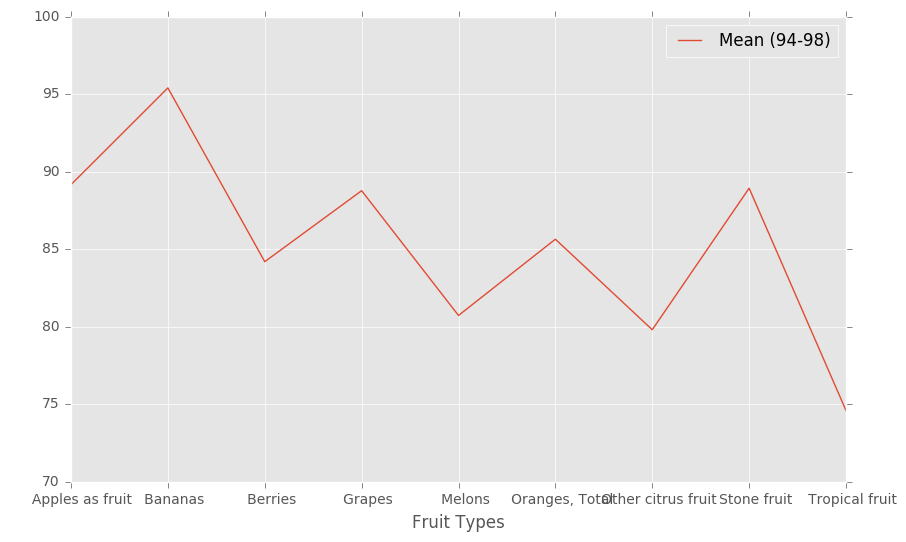

In [248]:
df_men.plot(x='Fruit Types', y='Mean (94-98)')

In [254]:
df_transpose = df_men.transpose()

In [257]:
df_transpose

,Apples as fruit,Bananas,Berries,Grapes,Melons,"Oranges,Total",Other citrus fruit,Stone fruit,Tropical fruit
Fruit Types,Apples as fruit,Bananas,Berries,Grapes,Melons,"Oranges, Total",Other citrus fruit,Stone fruit,Tropical fruit
Mean (94-98),89.18,95.42,84.21,88.79,80.74,85.66,79.82,88.95,74.61
Mean(03-04),90.86,94.85,88.57,88.55,79.72,84.46,73.74,94.02,74.58
Mean(05-06),89.7,95.59,91.83,93.65,80.85,86,72.95,93.05,76.94
Mean(07-08),93.35,93.96,90.7,92.16,84.97,84.16,61.9,95.89,84.68


In [256]:
df_transpose.columns=['Apples as fruit','Bananas','Berries','Grapes','Melons','Oranges,Total','Other citrus fruit','Stone fruit','Tropical fruit']

In [259]:
df_transpose = df_transpose[1:]

In [265]:
df_transpose

,Apples as fruit,Bananas,Berries,Grapes,Melons,"Oranges,Total",Other citrus fruit,Stone fruit,Tropical fruit
Mean (94-98),89.18,95.42,84.21,88.79,80.74,85.66,79.82,88.95,74.61
Mean(03-04),90.86,94.85,88.57,88.55,79.72,84.46,73.74,94.02,74.58
Mean(05-06),89.7,95.59,91.83,93.65,80.85,86,72.95,93.05,76.94
Mean(07-08),93.35,93.96,90.7,92.16,84.97,84.16,61.9,95.89,84.68


In [297]:
df_men.columns=['Fruit Types','94-98','03-04','05-06','07-08']

In [298]:
df_men

,Fruit Types,94-98,03-04,05-06,07-08
0,Apples as fruit,89.18,90.86,89.7,93.35
1,Bananas,95.42,94.85,95.59,93.96
2,Berries,84.21,88.57,91.83,90.7
3,Grapes,88.79,88.55,93.65,92.16
4,Melons,80.74,79.72,80.85,84.97
5,"Oranges, Total",85.66,84.46,86,84.16
6,Other citrus fruit,79.82,73.74,72.95,61.9
7,Stone fruit,88.95,94.02,93.05,95.89
8,Tropical fruit,74.61,74.58,76.94,84.68


In [270]:
df_men.transpose

,Apples as fruit,Bananas,Berries,Grapes,Melons,"Oranges,Total",Other citrus fruit,Stone fruit,Tropical fruit
Mean (94-98),89.18,95.42,84.21,88.79,80.74,85.66,79.82,88.95,74.61
Mean(03-04),90.86,94.85,88.57,88.55,79.72,84.46,73.74,94.02,74.58
Mean(05-06),89.7,95.59,91.83,93.65,80.85,86,72.95,93.05,76.94
Mean(07-08),93.35,93.96,90.7,92.16,84.97,84.16,61.9,95.89,84.68


In [301]:
df_transpose2 = df_men.transpose()

In [303]:
df_transpose2.columns=['Apples as fruit','Bananas','Berries','Grapes','Melons','Oranges,total','Other citrus fruit','Stone fruit','Tropical fruit']

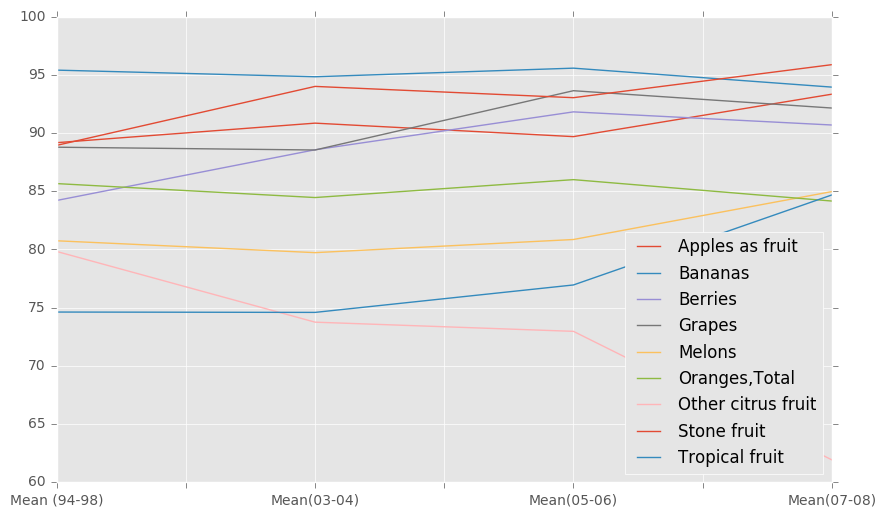

In [273]:
df_transpose.plot()

In [304]:
df_transpose2

,Apples as fruit,Bananas,Berries,Grapes,Melons,"Oranges,total",Other citrus fruit,Stone fruit,Tropical fruit
Fruit Types,Apples as fruit,Bananas,Berries,Grapes,Melons,"Oranges, Total",Other citrus fruit,Stone fruit,Tropical fruit
94-98,89.18,95.42,84.21,88.79,80.74,85.66,79.82,88.95,74.61
03-04,90.86,94.85,88.57,88.55,79.72,84.46,73.74,94.02,74.58
05-06,89.7,95.59,91.83,93.65,80.85,86,72.95,93.05,76.94
07-08,93.35,93.96,90.7,92.16,84.97,84.16,61.9,95.89,84.68


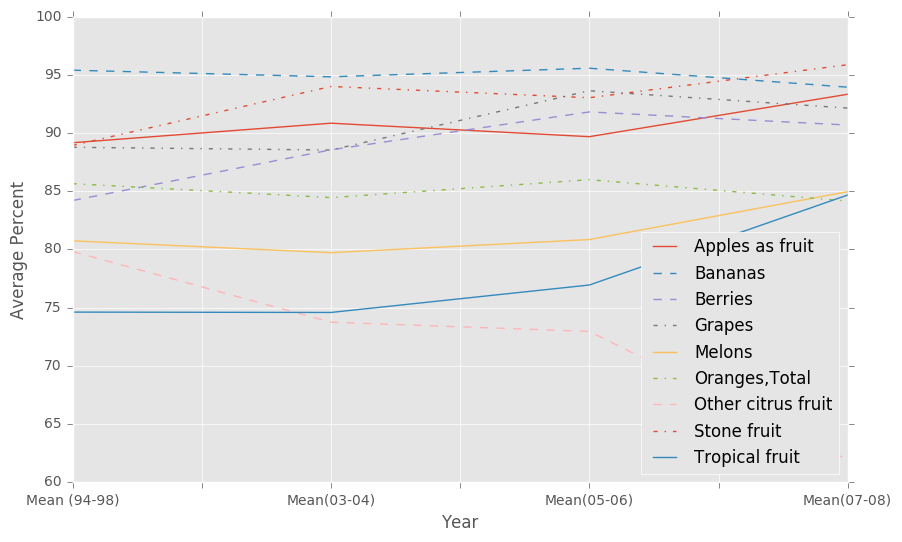

In [292]:
styles1 = ['-','--','--','-.','-','-.','--','-.','-']
df_transpose.plot(style=styles1)
plt.ylabel('Average Percent')
plt.xlabel('Year')

In [305]:
df_transpose2

,Apples as fruit,Bananas,Berries,Grapes,Melons,"Oranges,total",Other citrus fruit,Stone fruit,Tropical fruit
Fruit Types,Apples as fruit,Bananas,Berries,Grapes,Melons,"Oranges, Total",Other citrus fruit,Stone fruit,Tropical fruit
94-98,89.18,95.42,84.21,88.79,80.74,85.66,79.82,88.95,74.61
03-04,90.86,94.85,88.57,88.55,79.72,84.46,73.74,94.02,74.58
05-06,89.7,95.59,91.83,93.65,80.85,86,72.95,93.05,76.94
07-08,93.35,93.96,90.7,92.16,84.97,84.16,61.9,95.89,84.68


In [306]:
df_transpose2 = df_transpose2[1:]

In [307]:
df_transpose2

,Apples as fruit,Bananas,Berries,Grapes,Melons,"Oranges,total",Other citrus fruit,Stone fruit,Tropical fruit
94-98,89.18,95.42,84.21,88.79,80.74,85.66,79.82,88.95,74.61
03-04,90.86,94.85,88.57,88.55,79.72,84.46,73.74,94.02,74.58
05-06,89.7,95.59,91.83,93.65,80.85,86,72.95,93.05,76.94
07-08,93.35,93.96,90.7,92.16,84.97,84.16,61.9,95.89,84.68


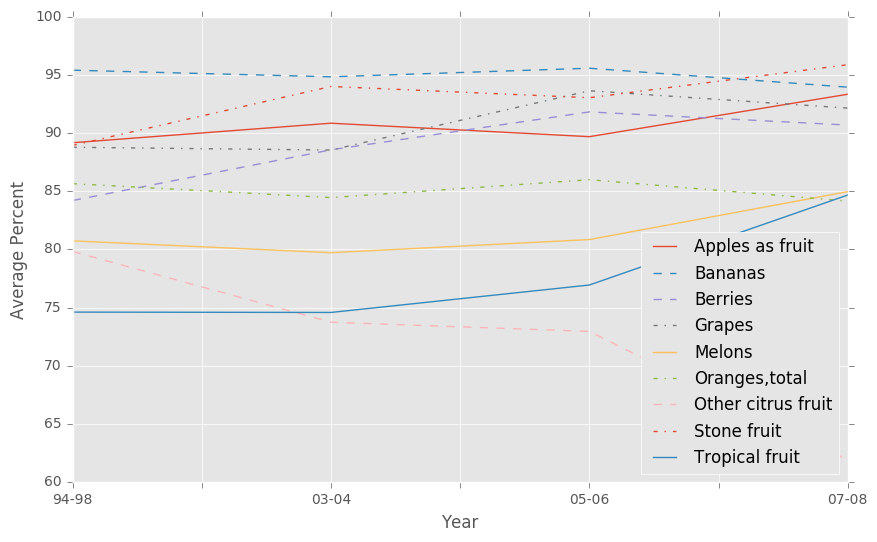

In [312]:
styles1 = ['-','--','--','-.','-','-.','--','-.','-']
df_transpose2.plot(style=styles1)
plt.ylabel('Average Percent')
plt.xlabel('Year')

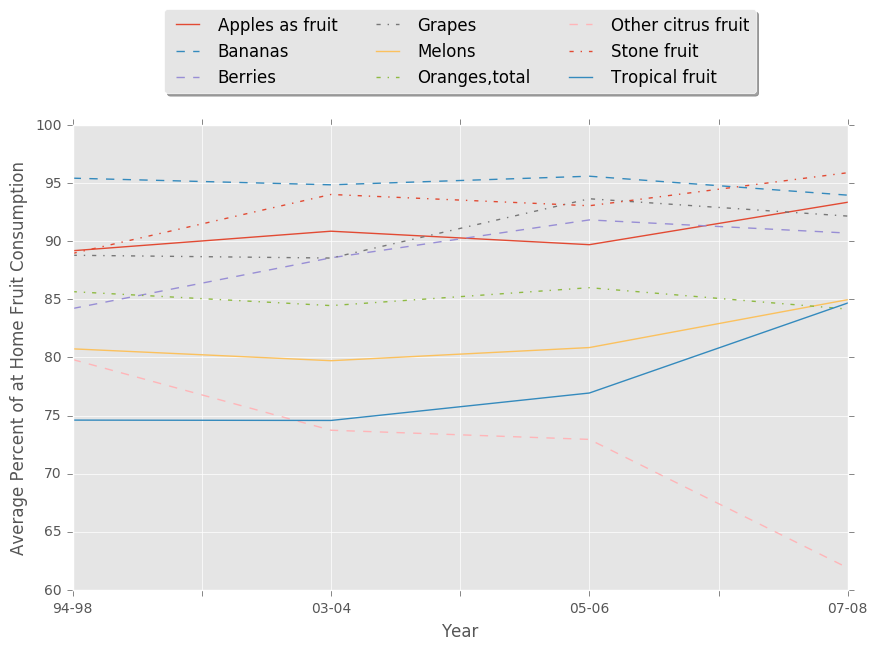

In [324]:
styles1 = ['-','--','--','-.','-','-.','--','-.','-']
df_transpose2.plot(style=styles1)
plt.ylabel('Average Percent of at Home Fruit Consumption')
plt.xlabel('Year')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),ncol=3, fancybox=True, shadow=True)
